# **Parte 1: EDA**
---

## **1. Descargar el dataset desde el repositorio de UCI**

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
energy_efficiency = fetch_ucirepo(id=242)

# data (as pandas dataframes)
X = energy_efficiency.data.features
y = energy_efficiency.data.targets

## **2. Mostrar las primeras filas del dataset**

In [ ]:
import pandas as pd

# Creamos un dataframe con los atributos y las variables objetivo
df = pd.concat([X, y], axis=1)

df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


## **3. Describir las estadísticas básicas de las características y valores faltantes**

In [ ]:
# variable information
energy_efficiency.variables

,name,role,type,demographic,description,units,missing_values
0,X1,Feature,Continuous,None,Relative Compactness,None,no
1,X2,Feature,Continuous,None,Surface Area,None,no
2,X3,Feature,Continuous,None,Wall Area,None,no
3,X4,Feature,Continuous,None,Roof Area,None,no
4,X5,Feature,Continuous,None,Overall Height,None,no
5,X6,Feature,Integer,None,Orientation,None,no
6,X7,Feature,Continuous,None,Glazing Area,None,no
7,X8,Feature,Integer,None,Glazing Area Distribution,None,no
8,Y1,Target,Continuous,None,Heating Load,None,no
9,Y2,Target,Continuous,None,Cooling Load,None,no


In [ ]:
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


## **Pregunta:**

* **¿Hay variabilidad significativa en alguna de las variables?**

  No, en los rangos y desviaciones estándar en la salida de `df.describe()` no se observa nada fuera de lo normal.
  

* **¿Qué indican los valores extremos (máximos y mínimos) en términos de diseño de edificios?**

  Indican que un edificio con valores más allá de estos extremos no sería un ejemplo realmente representativo.

## **4. Distribución de Variables y Detección de Valores Atípicos**

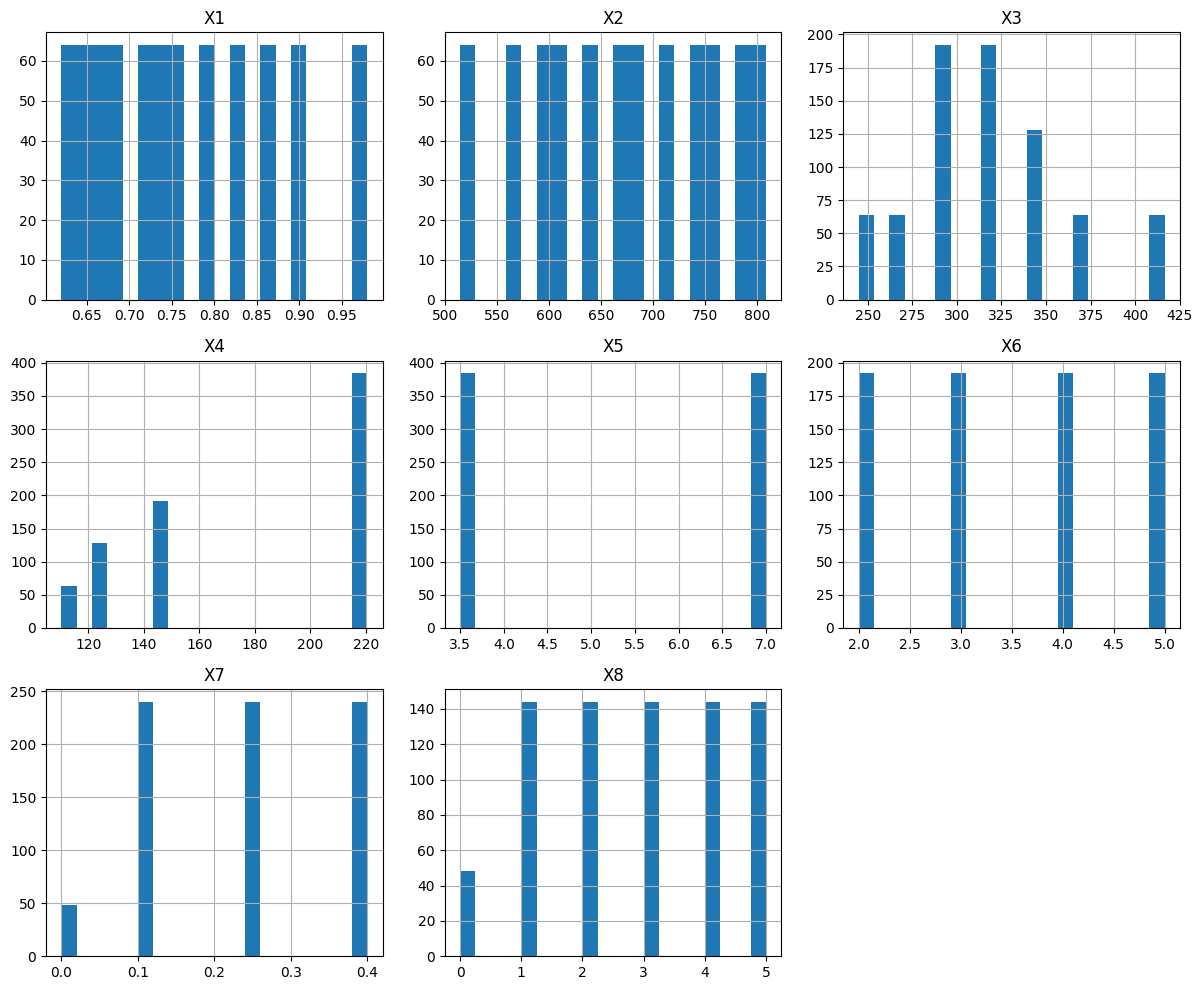

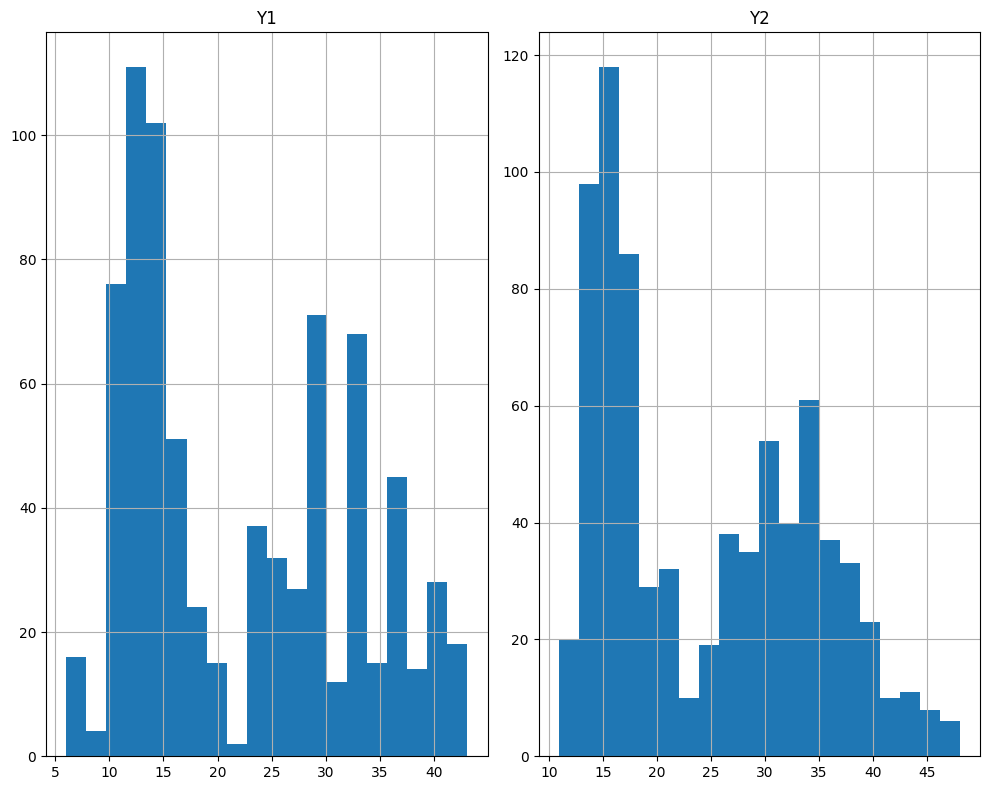

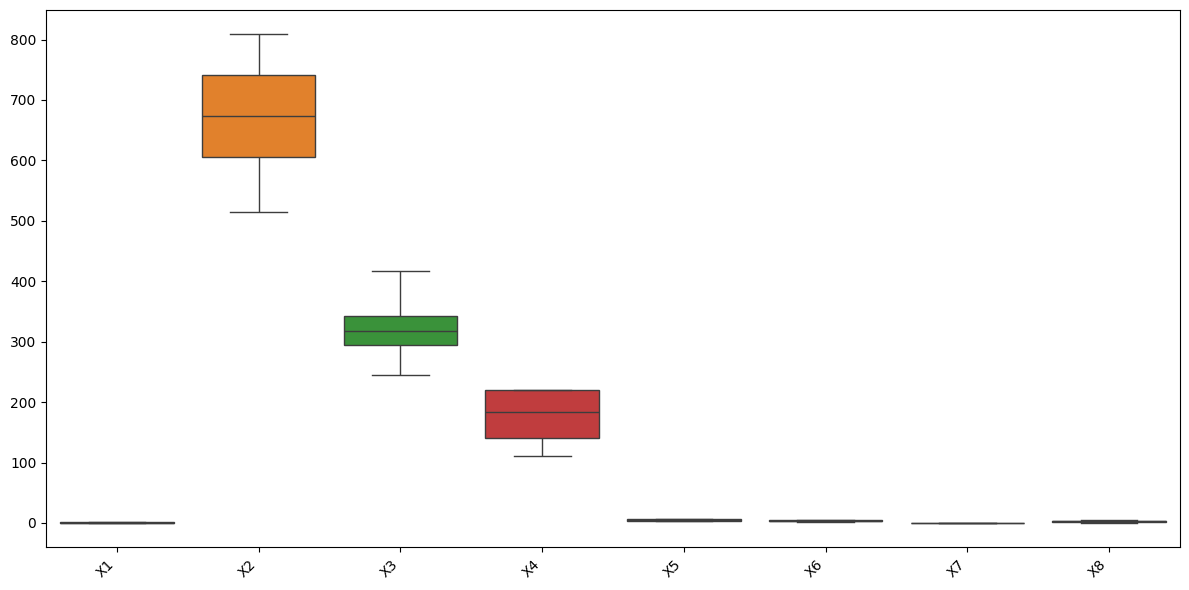

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

X.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

y.hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=X)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## **Pregunta:**

* **¿La mayoría de las variables siguen una distribución normal, uniforme o están sesgadas?**

  La mayoría de las variables parecen tener una distribución sesgada (por la cola más larga en un lado de la distribución para algunas variables) o uniforme. Por ejemplo, X4, X5, X7 y X8 parecen tener una distribución sesgada. Mientras que, X1, X2 y X6 tienen una distribución más uniforme.


* **¿Existen valores atípicos? ¿Podrían estos valores atípicos reflejar condiciones de diseño inusuales?**

  Atendiendo a los diagramas de caja, no se observan valores atípicos.

## **5. Correlación entre Variables**

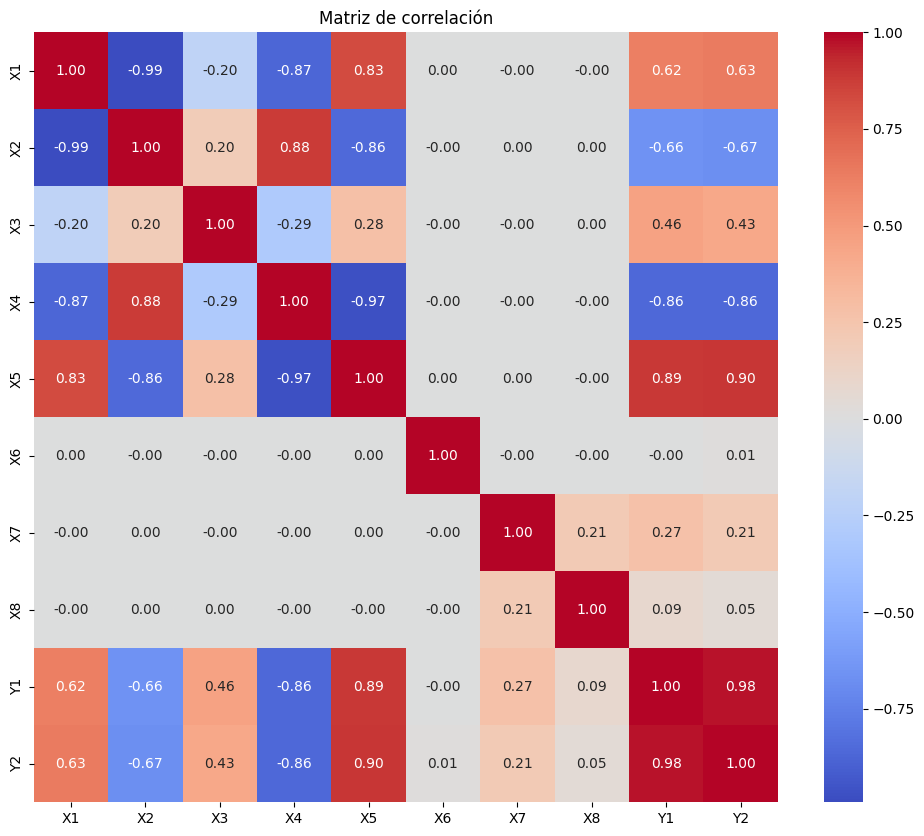

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))  # Adjust size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

## **Pregunta:**

* **¿Cuáles variables tienen una alta correlación con el Heating Load (Y1)?**

  - X4: Área del techo.
  - X5: Área de superficie de ventana.


* **¿Hay variables con alta correlación entre sí que podrían ser redundantes en el modelo?**

  - X1 y X2.
  - X4 y X5.

## **6. Relación entre Características y la Variable Objetivo**

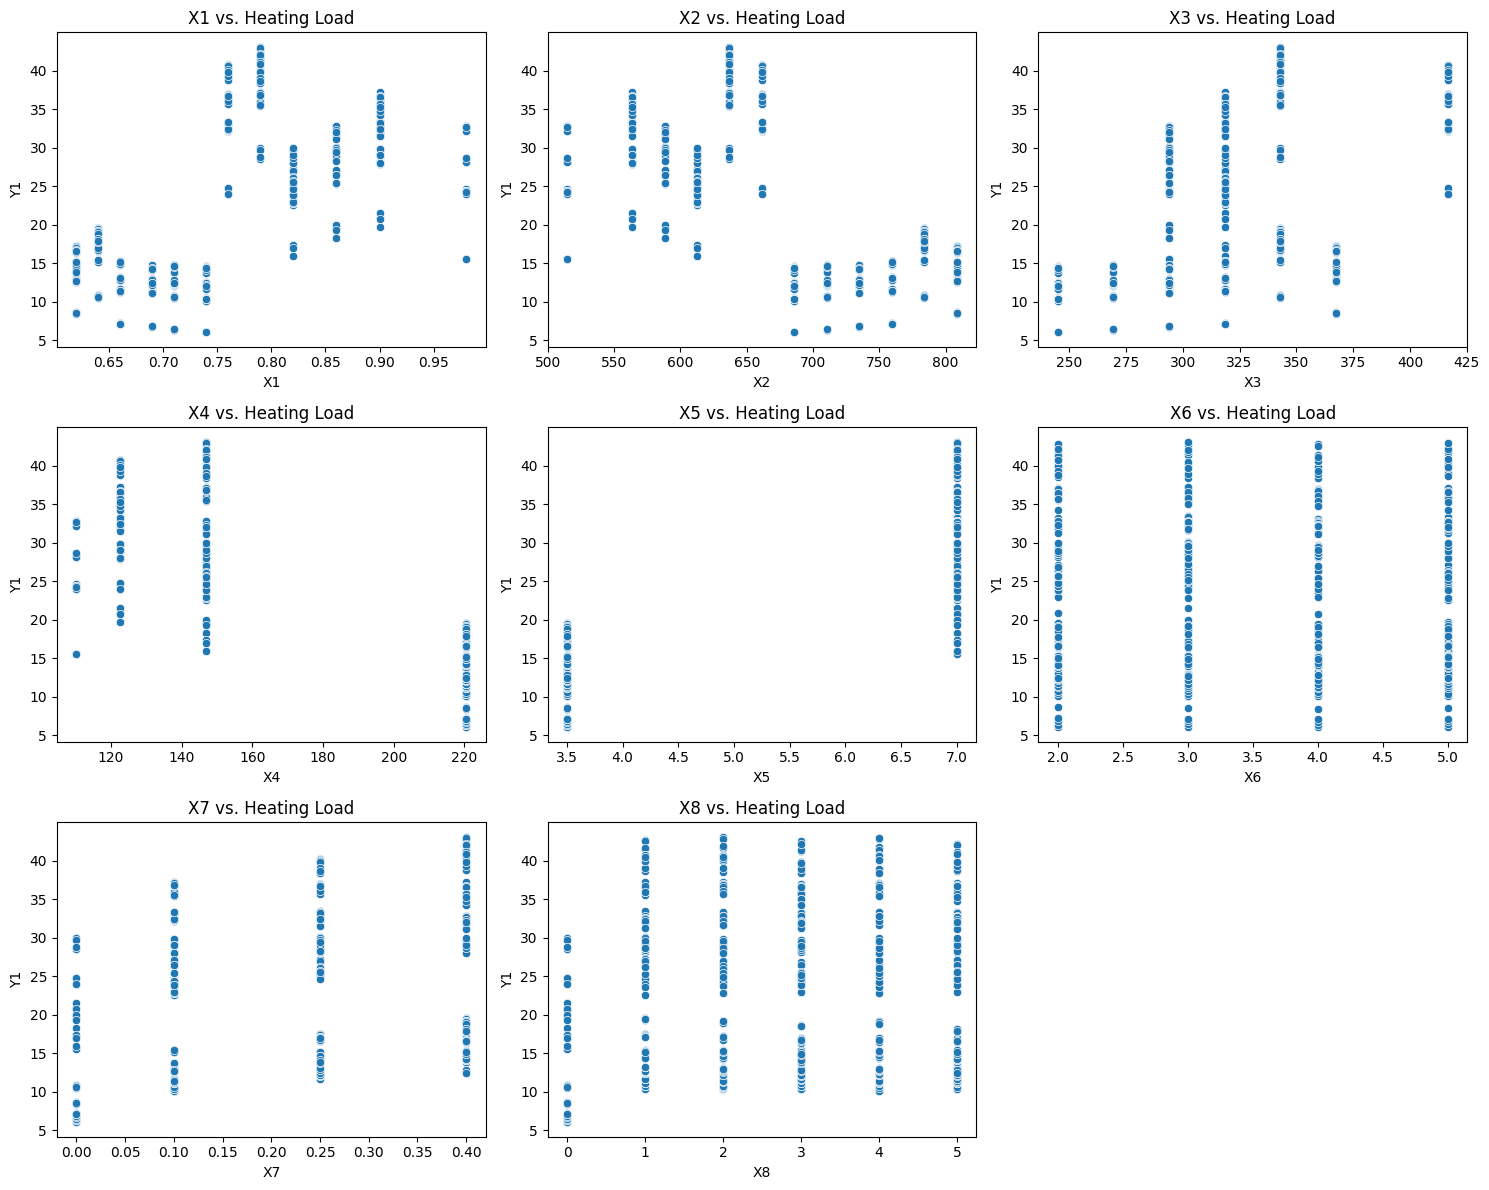

In [ ]:
# Número de filas y columnas para el grid de subplots
num_rows = 3
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))

feature_index = 0

for row in range(num_rows):
    for col in range(num_cols):

        if feature_index < len(X.columns):
            feature = X.columns[feature_index]
            sns.scatterplot(x=X[feature], y=y['Y1'], ax=axes[row, col])
            axes[row, col].set_title(f'{feature} vs. Heating Load')
            feature_index += 1

        else:
            axes[row, col].axis('off')

plt.tight_layout()
plt.show()

## **Pregunta:**

* **¿Alguna de las características muestra una relación claramente lineal o no lineal con el Heating Load?**

    Sí, las anteriormente mencionadas: X1, X2, X4 y X5.


* **¿Qué tipo de patrones observan?**

    Una tendencia de los puntos a aumentar o disminuir conforme aumenta Y1.

## **7. Análisis de Distribución de las Variables de Superficie (X1, X2, etc.)**

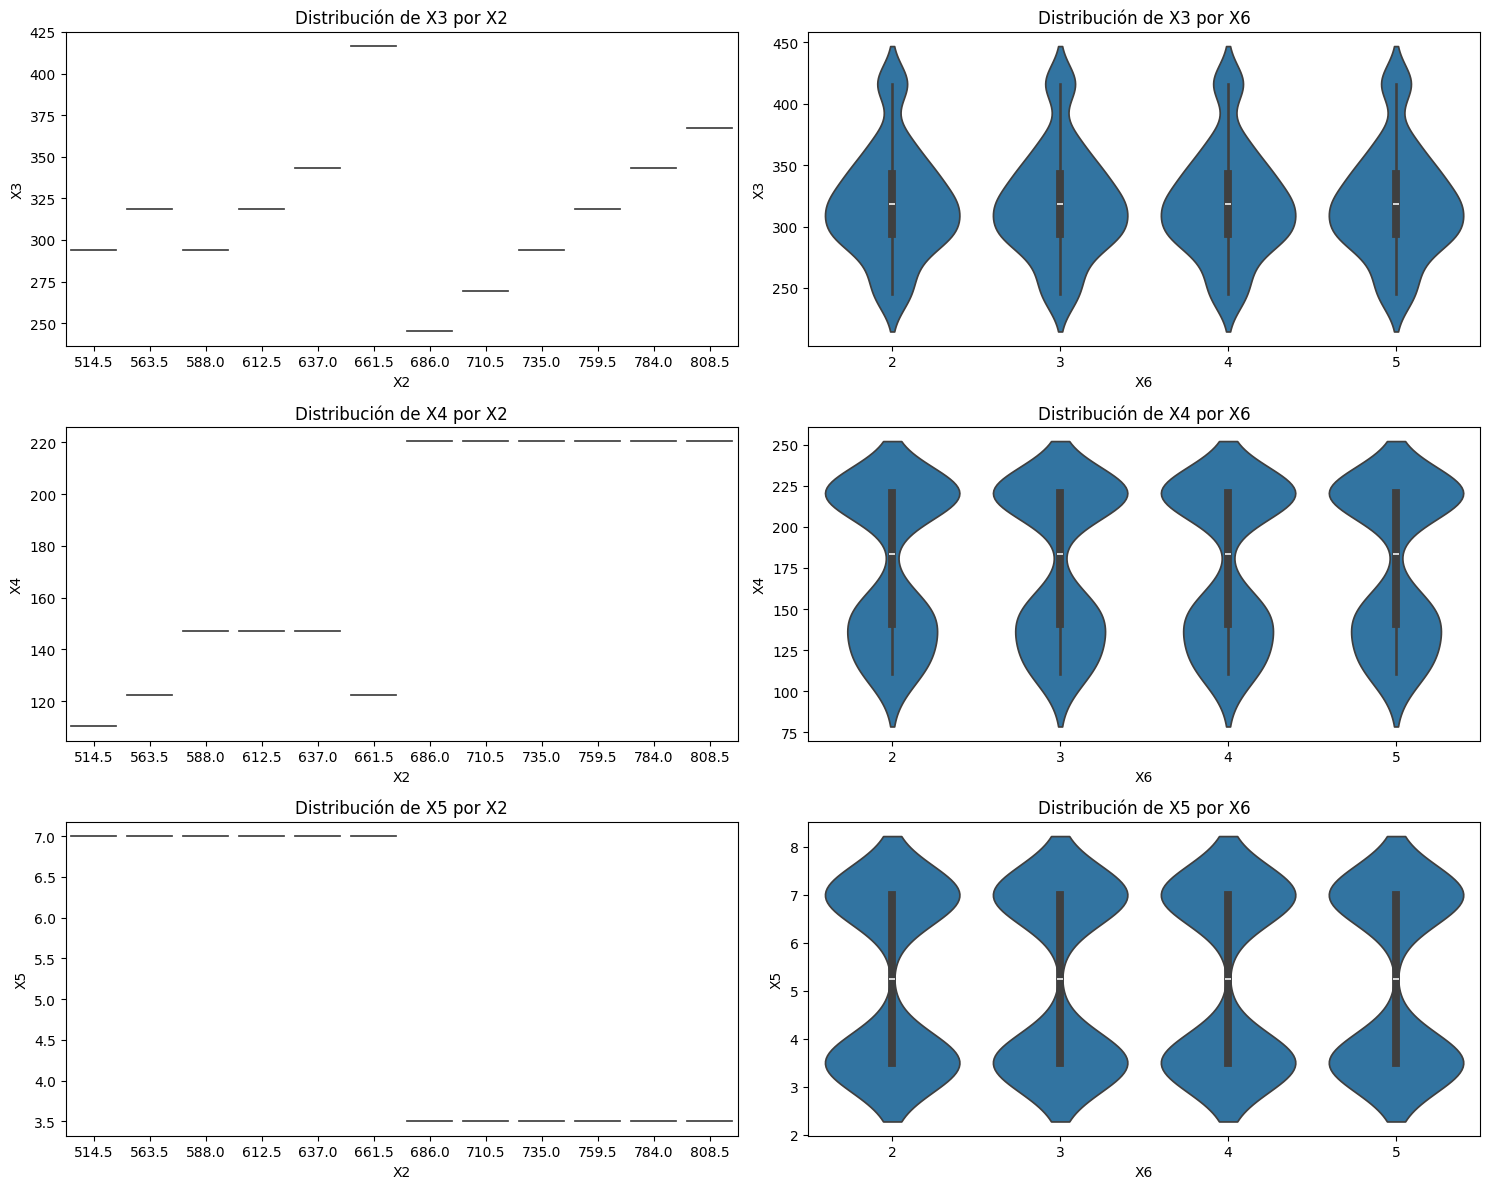

In [ ]:
variables = ['X3', 'X4', 'X5']
grupos = ['X2', 'X6']

fig, axes = plt.subplots(len(variables), len(grupos), figsize=(15, 12))

# Iteramos sobre las variables y grupos para crear los gráficos
for i, var in enumerate(variables):
    for j, grupo in enumerate(grupos):
        sns.violinplot(x=grupo, y=var, data=df, ax=axes[i, j])
        axes[i, j].set_title(f'Distribución de {var} por {grupo}')

plt.tight_layout()
plt.show()

## **Pregunta:**

* **¿Existen patrones evidentes en las variables de superficie según la orientación o tamaño del edificio?**

    No, no se ven patrones evidentes.

## **8. Efecto de la Orientación y Distribución de Superficie de Ventanas (X6 y X7)**

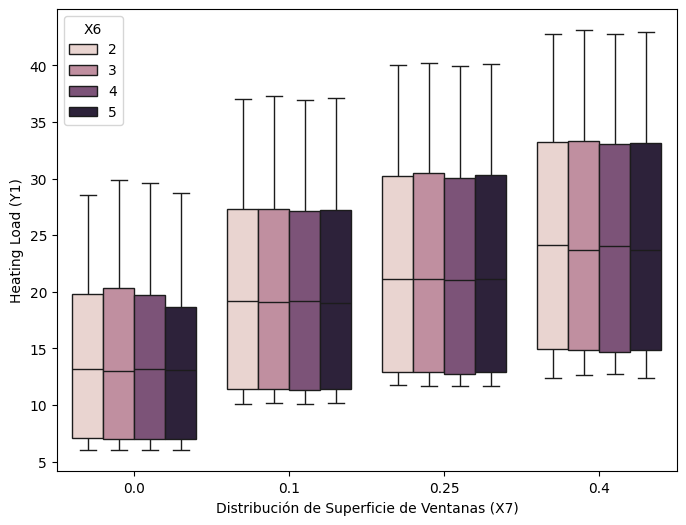

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='X7', y='Y1', hue='X6', data=df)
plt.xlabel('Distribución de Superficie de Ventanas (X7)')
plt.ylabel('Heating Load (Y1)')
plt.show()

## **Pregunta:**

* **¿Qué orientaciones parecen requerir una mayor carga térmica de calefacción**

    Las orientaciones 2 y 3, dados sus rangos intercuartílicos y bigotes.


* **¿La distribución de ventanas afecta considerablemente el Heating Load?**

    Ligeramente, sobretodo a partir de 0.1.

## **9. Visualización de Relaciones No Lineales**

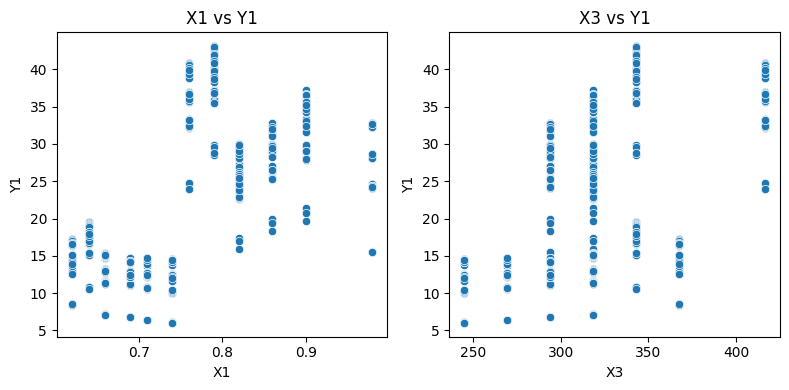

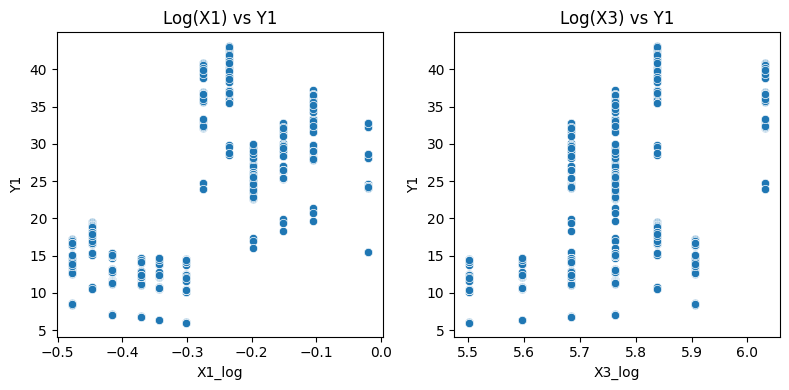

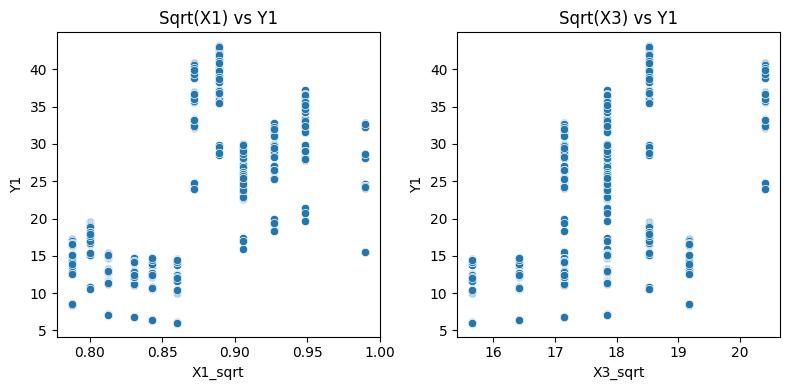

In [ ]:
import numpy as np

df['X1_log'] = np.log(df['X1'])
df['X3_log'] = np.log(df['X3'])

df['X1_sqrt'] = np.sqrt(df['X1'])
df['X3_sqrt'] = np.sqrt(df['X3'])


plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.scatterplot(x='X1', y='Y1', data=df)
plt.title('X1 vs Y1')

plt.subplot(1, 2, 2)
sns.scatterplot(x='X3', y='Y1', data=df)
plt.title('X3 vs Y1')

plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.scatterplot(x='X1_log', y='Y1', data=df)
plt.title('Log(X1) vs Y1')

plt.subplot(1, 2, 2)
sns.scatterplot(x='X3_log', y='Y1', data=df)
plt.title('Log(X3) vs Y1')

plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.scatterplot(x='X1_sqrt', y='Y1', data=df)
plt.title('Sqrt(X1) vs Y1')

plt.subplot(1, 2, 2)
sns.scatterplot(x='X3_sqrt', y='Y1', data=df)
plt.title('Sqrt(X3) vs Y1')

plt.tight_layout()
plt.show()

## **Pregunta:**

* **¿Existen transformaciones de variables que puedan facilitar una relación lineal o más clara con el Heating Load?**

    Si las hay, no son ni el logaritmo, ni la raíz cuadrada.
    Por otro lado, es posible que la relación entre estas variables y el Heating Load sea intrínsecamente no lineal.

* **¿Qué estrategias de transformación podrían mejorar la interpretación y ajuste del modelo?**

    - Más datos: A veces, la falta de linealidad puede deberse a la escasez de datos.

    - Otras transformaciones: como Box-Cox o Yeo-Johnson.

---

# **Preguntas Finales de Análisis Reflexivo**

* **¿Qué variables podrían tener mayor relevancia para predecir la carga térmica en función del análisis exploratorio?**

    Las variables con mayor relevancia para predecir la carga térmica parecen ser X1, X2, X4 y X5. Estas variables mostraron una mayor correlación y patrones más claros en relación con la carga térmica (Y1) durante el análisis exploratorio.


* **¿Considerarían eliminar o transformar alguna variable debido a su multicolinealidad o baja variabilidad?**

    Sí, se podrían considerar eliminar X1 o X2 debido a su alta correlación, y X4 o X5 por la misma razón.


* **¿Existen configuraciones en el diseño arquitectónico que optimicen la eficiencia térmica según el análisis exploratorio?**

    Sí, el análisis exploratorio sugiere algunas configuraciones para optimizar la eficiencia térmica:

    - Reducir el área de superficie de ventana (X5) y aumentar el área del techo (X4), ya que estas variables tienen alta correlación con la carga térmica.
    - Ajustar la orientación (X6): las orientaciones 2 y 3 parecen requerir mayor calefacción.
    - Considerar la distribución de ventanas (X7): su impacto en la carga térmica es ligero, pero perceptible.


* **¿Qué tipo de modelo o técnicas de preprocesamiento podrían ayudar a capturar
patrones no lineales en el dataset?**

    Se podrían considerar los siguientes modelos y técnicas:

    - Redes Neuronales: Capturan relaciones complejas y no lineales.

    - Support Vector Machines (SVM) con kernel no lineal: Permiten modelar relaciones no lineales usando kernels como RBF o polinomiales.

    - K-Nearest Neighbors (KNN): Modelo no paramétrico que puede adaptarse a patrones no lineales.

    - Árboles de Decisión y Random Forest: Capturan no linealidades al segmentar el espacio de características.

    - Transformaciones no lineales de variables: Ingeniería de características para crear nuevas variables que representen mejor las relaciones no lineales.

    - Reducción de dimensionalidad no lineal: Técnicas como t-SNE o UMAP para visualizar y encontrar patrones no lineales en un espacio de menor dimensión.

# **Parte 2: Preprocesamiento de los Datos**
---

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y['Y1'], test_size=0.2, random_state=33)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Selecciona las 5 mejores características
selector = SelectKBest(score_func=f_regression, k=5) # f_regression como scoring function porque vamos a hacer regresión

selector.fit(X_train_scaled, y_train)

selected_features = selector.get_support(indices=True)

print("Características seleccionadas:", selected_features)

# Incluimos sólo las características seleccionadas en los cjtos. de train y test
X_train_selected = X_train_scaled[:, selected_features]
X_test_selected = X_test_scaled[:, selected_features]

Características seleccionadas: [0 1 2 3 4]


---

# **Preguntas:**

* **¿Qué importancia tiene el escalado en modelos de regresión que dependen de
distancia o gradientes?**

    El escalado es crucial en modelos de regresión que dependen de distancia o gradientes porque:

    - Evita que características con rangos mayores dominen el modelo.

    - Acelera la convergencia del algoritmo al asegurar que los gradientes no sean demasiado grandes.

    - Mejora la precisión del modelo al permitir que el algoritmo explore el espacio de características de forma más eficiente.


* **¿Cómo afecta la selección de características al rendimiento y complejidad del modelo?**

    Puede mejorar el rendimiento del modelo al reducir el ruido y la dimensionalidad, permitiendo que el modelo se centre en las variables más influyentes.

# **Parte 3: Entrenamiento de Modelos de Regresión**
---

## **Regresión Lineal: LinearRegression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Creamos y entrenamos el modelo
modelo = LinearRegression()
modelo.fit(X_train_selected, y_train)

# Realizamos predicciones en el conjunto de test
y_pred = modelo.predict(X_test_selected)

# Calculamos las métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error Cuadrático Medio (MSE):", mse)
print("Raíz del Error Cuadrático Medio (RMSE):", rmse)
print("Error Absoluto Medio (MAE):", mae)
print("Coeficiente de Determinación (R²):", r2)

Error Cuadrático Medio (MSE): 15.2019659932743
Raíz del Error Cuadrático Medio (RMSE): 3.898969863088749
Error Absoluto Medio (MAE): 2.896704282662312
Coeficiente de Determinación (R²): 0.8446233804609526


## **Regresión con Regularización Lasso y Ridge**

In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Definimos los modelos
lasso_model = Lasso(max_iter=10000)
ridge_model = Ridge(max_iter=10000)

# Definimos los rangos de hiperparámetros para la regularización
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

# Realiza la búsqueda de hiperparámetros con GridSearchCV (validación cruzada)
lasso_grid = GridSearchCV(lasso_model, lasso_params, scoring='neg_mean_squared_error', cv=5)
ridge_grid = GridSearchCV(ridge_model, ridge_params, scoring='neg_mean_squared_error', cv=5)
# Se usa neg_mean_squared_error porque GridSearchCV por defecto busca maximizar la función de puntuación

# Entrena los modelos para buscar los mejores hiperparámetros
lasso_grid.fit(X_train_selected, y_train)
ridge_grid.fit(X_train_selected, y_train)

print("Regularización óptima para Lasso:", lasso_grid.best_params_['alpha'])
print("Regularización óptima para Ridge:", ridge_grid.best_params_['alpha'])

# Obtenemos los mejores modelos
best_lasso_model = lasso_grid.best_estimator_
best_ridge_model = ridge_grid.best_estimator_

# Realizamos las predicciones en el conjunto de test
lasso_pred = best_lasso_model.predict(X_test_selected)
ridge_pred = best_ridge_model.predict(X_test_selected)

# Calculamos las métricas
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)
lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

print("\nMétricas de evaluación para Lasso:")
print("\tError Cuadrático Medio (MSE):", lasso_mse)
print("\tRaíz del Error Cuadrático Medio (RMSE):", lasso_rmse)
print("\tError Absoluto Medio (MAE):", lasso_mae)
print("\tCoeficiente de Determinación (R²):", lasso_r2)

print("\nMétricas de evaluación para Ridge:")
print("\tError Cuadrático Medio (MSE):", ridge_mse)
print("\tRaíz del Error Cuadrático Medio (RMSE):", ridge_rmse)
print("\tError Absoluto Medio (MAE):", ridge_mae)
print("\tCoeficiente de Determinación (R²):", ridge_r2)

Regularización óptima para Lasso: 0.001
Regularización óptima para Ridge: 0.1

Métricas de evaluación para Lasso:
	Error Cuadrático Medio (MSE): 15.102261018271617
	Raíz del Error Cuadrático Medio (RMSE): 3.886162762709717
	Error Absoluto Medio (MAE): 2.881852986531494
	Coeficiente de Determinación (R²): 0.8456424474667594

Métricas de evaluación para Ridge:
	Error Cuadrático Medio (MSE): 15.102483580243643
	Raíz del Error Cuadrático Medio (RMSE): 3.886191397788282
	Error Absoluto Medio (MAE): 2.881774741868947
	Coeficiente de Determinación (R²): 0.8456401727000045


## **Árbol de Decisión: DecisionTreeRegressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Creamos y entrenamos el modelo
tree_model = DecisionTreeRegressor(random_state=33)
tree_model.fit(X_train_selected, y_train)

# Realiza la búsqueda de hiperparámetros con GridSearchCV (validación cruzada)
param_grid = {'max_depth': range(2, 21)}  # Exploramos profundidades de 2 a 20

grid_search = GridSearchCV(tree_model, param_grid,
scoring='neg_mean_squared_error', cv=5) # Se usa neg_mean_squared_error porque GridSearchCV por defecto busca maximizar la función de puntuación

# Entrena el modelo para buscar los mejores hiperparámetros
grid_search.fit(X_train_selected, y_train)

print("Profundidad óptima del árbol:", grid_search.best_params_['max_depth'])

# Obtenemos el mejor modelo
best_tree_model = grid_search.best_estimator_

# Realizamos las predicciones en el conjunto de test
y_pred_tree = best_tree_model.predict(X_test_selected)

# Calculamos las métricas
tree_mse = mean_squared_error(y_test, y_pred_tree)
tree_rmse = np.sqrt(tree_mse)
tree_mae = mean_absolute_error(y_test, y_pred_tree)
tree_r2 = r2_score(y_test, y_pred_tree)

print("\nError Cuadrático Medio (MSE):", tree_mse)
print("Raíz del Error Cuadrático Medio (RMSE):", tree_rmse)
print("Error Absoluto Medio (MAE):", tree_mae)
print("Coeficiente de Determinación (R²):", tree_r2)

Profundidad óptima del árbol: 4

Error Cuadrático Medio (MSE): 9.046297657137961
Raíz del Error Cuadrático Medio (RMSE): 3.0077063781456395
Error Absoluto Medio (MAE): 2.17116254422129
Coeficiente de Determinación (R²): 0.9075393833973867


## **Red Neuronal Artificial (Perceptrón Multicapa): MLPRegressor**

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Definimos el modelo
mlp_model = MLPRegressor(random_state=33, max_iter=5000)
# max_iter para evitar warnings

# Definimos los rangos de hiperparámetros para la búsqueda
param_grid = {
    'hidden_layer_sizes': [(100), (50, 50), (100, 50)],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

# Realiza la búsqueda de hiperparámetros con GridSearchCV (validación cruzada)
grid_search = GridSearchCV(mlp_model, param_grid, scoring='neg_mean_squared_error', cv=5)

# Entrenamos el modelo para buscar los mejores hiperparámetros
grid_search.fit(X_train_selected, y_train)

# Mostramos los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Obtenemos el mejor modelo
best_mlp_model = grid_search.best_estimator_

# Realizamos las predicciones en el conjunto de test
y_pred_mlp = best_mlp_model.predict(X_test_selected)

# Calculamos las métricas de evaluación
mlp_mse = mean_squared_error(y_test, y_pred_mlp)
mlp_rmse = np.sqrt(mlp_mse)
mlp_mae = mean_absolute_error(y_test, y_pred_mlp)
mlp_r2 = r2_score(y_test, y_pred_mlp)

print("\nError Cuadrático Medio (MSE):", mlp_mse)
print("Raíz del Error Cuadrático Medio (RMSE):", mlp_rmse)
print("Error Absoluto Medio (MAE):", mlp_mae)
print("Coeficiente de Determinación (R²):", mlp_r2)

Mejores hiperparámetros: {'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.001}

Error Cuadrático Medio (MSE): 9.807556515535369
Raíz del Error Cuadrático Medio (RMSE): 3.1317018561056176
Error Absoluto Medio (MAE): 2.33529610396415
Coeficiente de Determinación (R²): 0.8997586905538246


## **Máquina de Vectores de Soporte: SVR**

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Creamos el modelo SVR con parámetros predeterminados
modelo_svr = SVR()

# Entrenamos el modelo con los datos de train
modelo_svr.fit(X_train_selected, y_train)

# Realizamos predicciones en el conjunto de test
y_pred_svr = modelo_svr.predict(X_test_selected)

# Calculamos las métricas de evaluación
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("Error Cuadrático Medio (MSE):", mse_svr)
print("Raíz del Error Cuadrático Medio (RMSE):", rmse_svr)
print("Error Absoluto Medio (MAE):", mae_svr)
print("Coeficiente de Determinación (R²):", r2_svr)

---
# **Preguntas:**

* **¿Qué modelo obtuvo el menor error cuadrático medio en el conjunto de prueba?**

    Árbol de Decisión: **`DecisionTreeRegressor`**


* **¿Cómo afecta el ajuste de parámetros al rendimiento de cada modelo?**

    Ayuda a optimizarlos para los datos proporcionados.


* **¿Cuáles son las diferencias en la predicción entre un árbol de decisión y un modelo lineal?**

    Los árboles de decisión son más flexibles en relaciones no lineales, mientras que los modelos lineales son más simples y fáciles de interpretar pero pueden ser menos precisos en casos de alta no linealidad.

# **Parte 4: Análisis de Residuos**
---

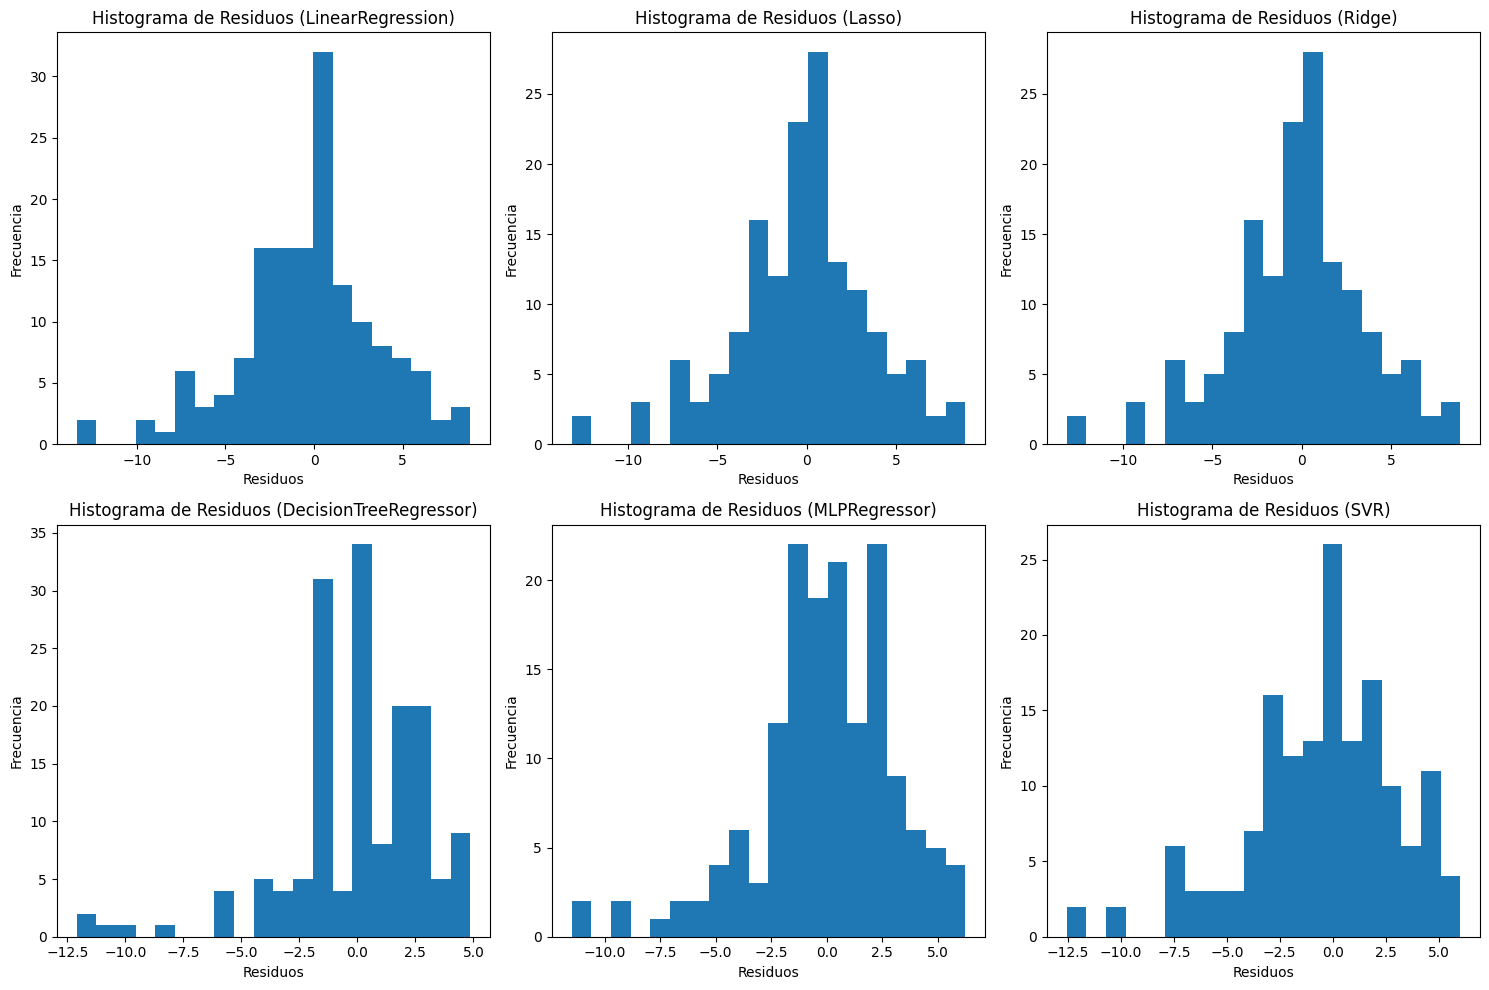

Text(0, 0.5, 'Valores Predichos')

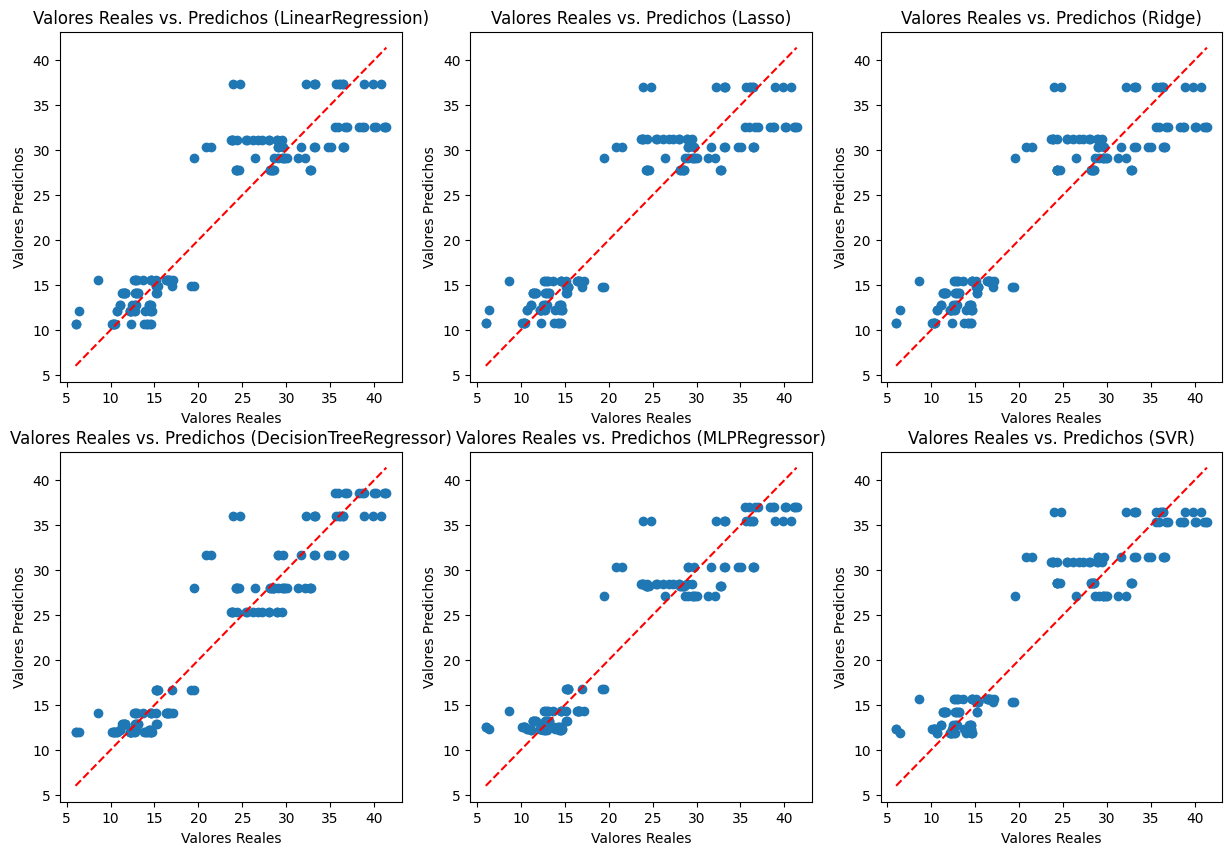

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculamos los residuos para cada modelo
residuals_linear = y_test - y_pred
residuals_lasso = y_test - lasso_pred
residuals_ridge = y_test - ridge_pred
residuals_tree = y_test - y_pred_tree
residuals_mlp = y_test - y_pred_mlp
residuals_svr = y_test - y_pred_svr


# Creamos los histogramas de residuos
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.hist(residuals_linear, bins=20)
plt.title('Histograma de Residuos (LinearRegression)')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

plt.subplot(2, 3, 2)
plt.hist(residuals_lasso, bins=20)
plt.title('Histograma de Residuos (Lasso)')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

plt.subplot(2, 3, 3)
plt.hist(residuals_ridge, bins=20)
plt.title('Histograma de Residuos (Ridge)')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

plt.subplot(2, 3, 4)
plt.hist(residuals_tree, bins=20)
plt.title('Histograma de Residuos (DecisionTreeRegressor)')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

plt.subplot(2, 3, 5)
plt.hist(residuals_mlp, bins=20)
plt.title('Histograma de Residuos (MLPRegressor)')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

plt.subplot(2, 3, 6)
plt.hist(residuals_svr, bins=20)
plt.title('Histograma de Residuos (SVR)')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


# Creamos los gráficos de valores reales vs. predichos
plt.figure(figsize=(15, 10))

# LinearRegression
plt.subplot(2, 3, 1)
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Línea y=x
plt.title('Valores Reales vs. Predichos (LinearRegression)')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')

# Lasso
plt.subplot(2, 3, 2)
plt.scatter(y_test, lasso_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Línea y=x
plt.title('Valores Reales vs. Predichos (Lasso)')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')

# Ridge
plt.subplot(2, 3, 3)
plt.scatter(y_test, ridge_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Línea y=x
plt.title('Valores Reales vs. Predichos (Ridge)')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')

# DecisionTreeRegressor
plt.subplot(2, 3, 4)
plt.scatter(y_test, y_pred_tree)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Línea y=x
plt.title('Valores Reales vs. Predichos (DecisionTreeRegressor)')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')

# MLPRegressor
plt.subplot(2, 3, 5)
plt.scatter(y_test, y_pred_mlp)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Línea y=x
plt.title('Valores Reales vs. Predichos (MLPRegressor)')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')

# SVR
plt.subplot(2, 3, 6)
plt.scatter(y_test, y_pred_svr)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Línea y=x
plt.title('Valores Reales vs. Predichos (SVR)')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')

---
# **Preguntas:**

* **¿Los residuos están centrados en torno al cero? ¿Qué implica esto sobre la precisión del modelo?**

    Sí, en general los residuos parecen estar centrados en torno al cero. Esto implica que los modelos no están sesgados y predicen valores cercanos a los reales.


* **¿Hay algún patrón en los residuos que sugiera problemas en el modelo?**

    En general, no hay patrones que sugieran problemas graves. Sin embargo, algunos modelos, como **`DecisionTreeRegressor`**, muestran una ligera tendencia a engordar las predicciones.


* **¿Qué modelo muestra los residuos más uniformemente distribuidos?**

    **`LinearRegression`**.

# **Parte 5: Comparación de Modelos y Conclusiones**
---

## **Comparación de modelos**

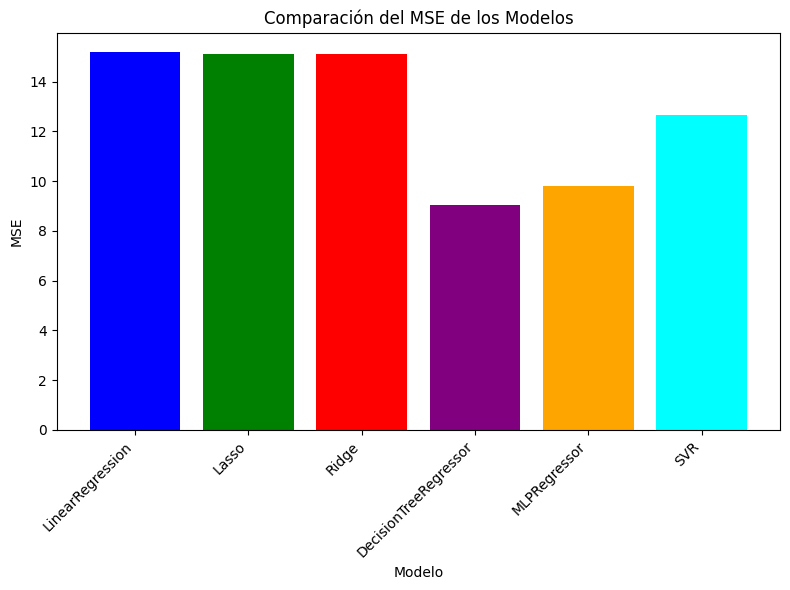

In [ ]:
# MSE de cada modelo
mse_values = [mse, lasso_mse, ridge_mse, tree_mse, mlp_mse, mse_svr]
model_names = ['LinearRegression', 'Lasso', 'Ridge', 'DecisionTreeRegressor', 'MLPRegressor', 'SVR']

# Creamos el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(model_names, mse_values, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
plt.title('Comparación del MSE de los Modelos')
plt.xlabel('Modelo')
plt.ylabel('MSE')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## **Análisis de residuos**

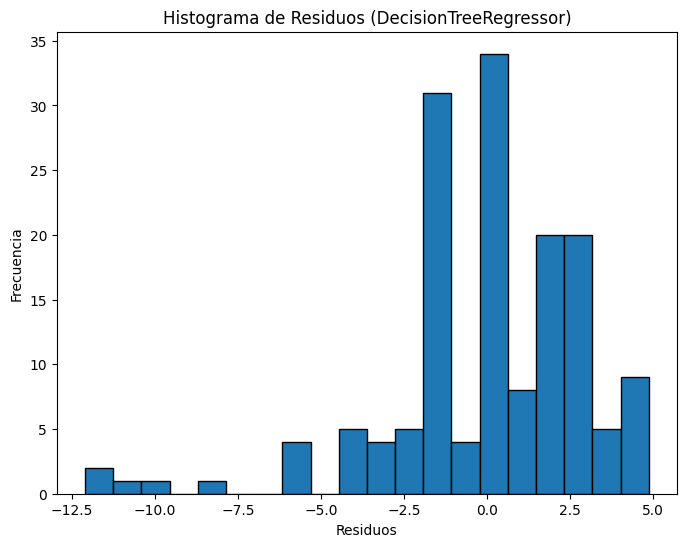

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(residuals_tree, bins=20, edgecolor='black')
plt.title('Histograma de Residuos (DecisionTreeRegressor)')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

## **Curva de ajuste**

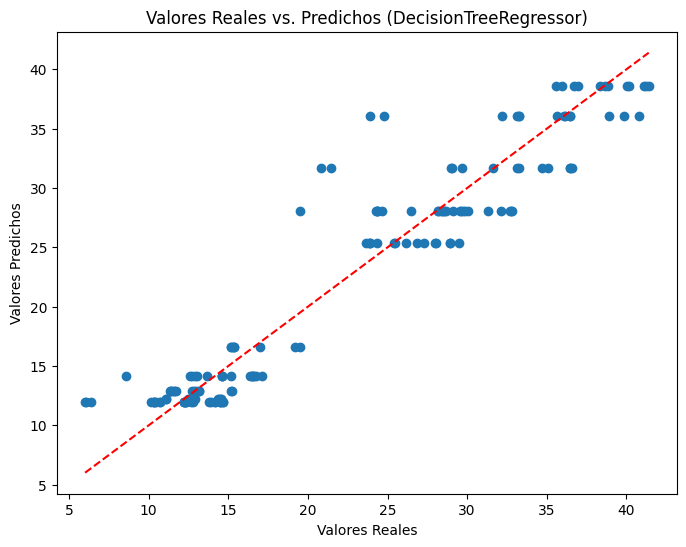

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_tree)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Valores Reales vs. Predichos (DecisionTreeRegressor)')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.show()

---
# **Preguntas finales:**

* **¿Cuál es el modelo más adecuado para predecir la carga térmica en función de las características de diseño?**

    **`DecisionTreeRegressor`** parece ser el modelo más adecuado para predecir la carga térmica, ya que obtuvo el menor error cuadrático medio (MSE) en el conjunto de prueba.


* **¿Qué interpretaciones pueden extraerse del análisis de residuos y los gráficos de ajuste?**

    El análisis de residuos y los gráficos de ajuste indican que, en general, los modelos predicen valores cercanos a los reales y no presentan sesgos significativos. Los residuos están centrados en torno al cero y no muestran patrones que sugieran problemas graves.


* **¿Cómo influye el preprocesamiento en el rendimiento de los modelos?**

    El preprocesamiento, que incluye escalado y selección de características, influye positivamente en el rendimiento de los modelos al reducir la dimensionalidad, evitar que las características con rangos mayores dominen el modelo y acelerar la convergencia del algoritmo.